In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import time

In [40]:
# Hàm đọc dữ liệu từ file `.txt` và chuẩn bị X và y_true
def load_data(file_paths):
    data = []
    labels = []
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            for line in file:
                tokens = line.strip().split()
                labels.append(tokens[0])  # Lưu nhãn (từ khóa đầu tiên)
                data.append(np.array(tokens[1:], dtype=float))  # Lưu các đặc trưng embedding
    return np.array(data), labels

In [41]:
# Đường dẫn tới các file dữ liệu cần đọc
file_paths = ["dataset/animals.txt", "dataset/countries.txt", "dataset/fruits.txt", "dataset/veggies.txt"]

In [42]:
# Tải dữ liệu và gán vào biến X và y_true
X, y_true = load_data(file_paths)

In [43]:
# Mã hóa y_true
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Hàm tính khoảng cách (Euclidean, Manhattan, Cosine)

In [44]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [45]:
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

In [46]:
def cosine_similarity(a, b):
    return 1 - np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [47]:
def kmeans(X, k, distance_metric=euclidean_distance, max_iter=100):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iter):
        clusters = defaultdict(list)
        for x in X:
            distances = [distance_metric(x, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(x)
        new_centroids = [np.mean(cluster, axis=0) for cluster in clusters.values()]
        
        # Sửa điều kiện kiểm tra bằng np.array_equal
        if np.array_equal(centroids, new_centroids):
            break
            
        centroids = new_centroids
    return clusters

In [48]:
# Cập nhật hàm evaluate_clusters để dùng y_true_encoded
def evaluate_clusters(clusters, y_true_encoded):
    y_pred = []
    for cluster_id, points in clusters.items():
        y_pred.extend([cluster_id] * len(points))
    
    precision = precision_score(y_true_encoded, y_pred, average='weighted')
    recall = recall_score(y_true_encoded, y_pred, average='weighted')
    f1 = f1_score(y_true_encoded, y_pred, average='weighted')
    return precision, recall, f1

In [49]:
# Thực hiện K-means với các giá trị k khác nhau
metrics = {'precision': [], 'recall': [], 'f1': []}

for k in range(1, 11):
    clusters = kmeans(X, k)
    precision, recall, f1 = evaluate_clusters(clusters, y_true_encoded)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

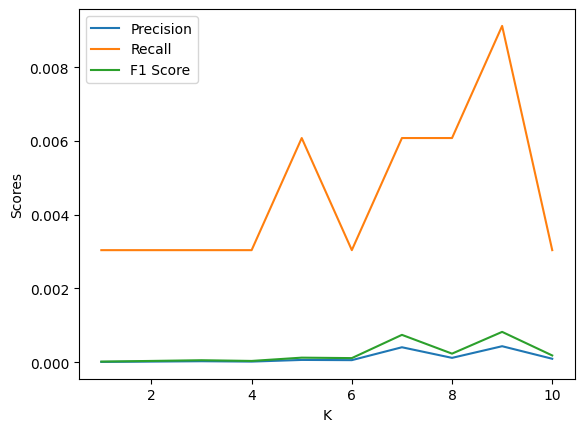

In [50]:
# Vẽ biểu đồ
plt.plot(range(1, 11), metrics['precision'], label='Precision')
plt.plot(range(1, 11), metrics['recall'], label='Recall')
plt.plot(range(1, 11), metrics['f1'], label='F1 Score')
plt.xlabel("K")
plt.ylabel("Scores")
plt.legend()
plt.show()